In [11]:
import pandas as pd


column_names = ['user_id', 'item_id', 'category_id', 'behavior_type', 'timestamp']

taobao_df = pd.read_csv(
    r"C:\Users\user\Desktop\JDE9\Taobao User Behavior Data Analysis\UserBehavior.csv",
    header=None,
    names=column_names
)

df_sample = taobao_df.sample(n=10000000,random_state=42)

print(df_sample.head(5))

          user_id  item_id  category_id behavior_type   timestamp
43314727   237858  1062152      1464116            pv  1512212331
88035905    44200  3916487      4135836            pv  1511931558
38200464   920479  2816757       154040            pv  1512311001
83578911   239462  2698818       154040            pv  1511783539
78996463   947273  3991295      1029459            pv  1512273837


In [12]:
print("check_taobao_df how may row",df_sample.shape)
df_sample.drop_duplicates()
print("drop_duplicates to taobao_df",df_sample.shape)

check_taobao_df how may row (10000000, 5)
drop_duplicates to taobao_df (10000000, 5)


In [13]:
df_sample.isnull().sum()

user_id          0
item_id          0
category_id      0
behavior_type    0
timestamp        0
dtype: int64

In [14]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000000 entries, 43314727 to 32394458
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        int64 
 1   item_id        int64 
 2   category_id    int64 
 3   behavior_type  object
 4   timestamp      int64 
dtypes: int64(4), object(1)
memory usage: 457.8+ MB


In [15]:
df_sample['timestamp'] = pd.to_datetime(df_sample['timestamp'], unit='s', utc=True)
df_sample['timestamp'] = df_sample['timestamp'].dt.tz_convert('Asia/Shanghai')
print(df_sample.head(5))

          user_id  item_id  category_id behavior_type  \
43314727   237858  1062152      1464116            pv   
88035905    44200  3916487      4135836            pv   
38200464   920479  2816757       154040            pv   
83578911   239462  2698818       154040            pv   
78996463   947273  3991295      1029459            pv   

                         timestamp  
43314727 2017-12-02 18:58:51+08:00  
88035905 2017-11-29 12:59:18+08:00  
38200464 2017-12-03 22:23:21+08:00  
83578911 2017-11-27 19:52:19+08:00  
78996463 2017-12-03 12:03:57+08:00  


In [16]:
df_sample['timestamp'] = df_sample['timestamp'].dt.tz_localize(None)
print(df_sample.head(5))


          user_id  item_id  category_id behavior_type           timestamp
43314727   237858  1062152      1464116            pv 2017-12-02 18:58:51
88035905    44200  3916487      4135836            pv 2017-11-29 12:59:18
38200464   920479  2816757       154040            pv 2017-12-03 22:23:21
83578911   239462  2698818       154040            pv 2017-11-27 19:52:19
78996463   947273  3991295      1029459            pv 2017-12-03 12:03:57


In [17]:
def to_date(dt):
    return dt.date()

def to_time(dt):
    return dt.time()

def getWeek(dt):
    return weekDict[dt.weekday()]


weekDict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}


df_sample['date'] = df_sample['timestamp'].apply(to_date)
df_sample['time'] = df_sample['timestamp'].apply(to_time)
df_sample['week'] = df_sample['timestamp'].apply(getWeek)

print(df_sample.head(5))

          user_id  item_id  category_id behavior_type           timestamp  \
43314727   237858  1062152      1464116            pv 2017-12-02 18:58:51   
88035905    44200  3916487      4135836            pv 2017-11-29 12:59:18   
38200464   920479  2816757       154040            pv 2017-12-03 22:23:21   
83578911   239462  2698818       154040            pv 2017-11-27 19:52:19   
78996463   947273  3991295      1029459            pv 2017-12-03 12:03:57   

                date      time week  
43314727  2017-12-02  18:58:51  Sat  
88035905  2017-11-29  12:59:18  Wed  
38200464  2017-12-03  22:23:21  Sun  
83578911  2017-11-27  19:52:19  Mon  
78996463  2017-12-03  12:03:57  Sun  


In [18]:
df_sample['hour'] = df_sample['time'].astype(str).str.split(':').str[0]

In [19]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000000 entries, 43314727 to 32394458
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   category_id    int64         
 3   behavior_type  object        
 4   timestamp      datetime64[ns]
 5   date           object        
 6   time           object        
 7   week           object        
 8   hour           object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 762.9+ MB


In [20]:
df_sample['date'] = pd.to_datetime(df_sample['date'])

start_date = pd.to_datetime('2017-11-25')
end_date = pd.to_datetime('2017-12-03')


filtered_taobao_df = df_sample[(df_sample['date'] >= start_date) & (df_sample['date'] <= end_date)]


In [49]:
filtered_taobao_df.head()

,user_id,item_id,category_id,behavior_type,timestamp,date,time,week,hour,dates
43314727,237858,1062152,1464116,pv,2017-12-02 18:58:51,2017-12-02,18:58:51,Sat,18,2017-12-02
88035905,44200,3916487,4135836,pv,2017-11-29 12:59:18,2017-11-29,12:59:18,Wed,12,2017-11-29
38200464,920479,2816757,154040,pv,2017-12-03 22:23:21,2017-12-03,22:23:21,Sun,22,2017-12-03
83578911,239462,2698818,154040,pv,2017-11-27 19:52:19,2017-11-27,19:52:19,Mon,19,2017-11-27
78996463,947273,3991295,1029459,pv,2017-12-03 12:03:57,2017-12-03,12:03:57,Sun,12,2017-12-03


In [22]:
pv_data = filtered_taobao_df[filtered_taobao_df['behavior_type'] == 'pv']

pv_uv_puv = pv_data.groupby('date').agg(
    pv=('user_id', 'count'),  
    uv=('user_id', pd.Series.nunique), 
).reset_index()

pv_uv_puv['puv'] = round(pv_uv_puv['pv'] / pv_uv_puv['uv'], 1)

print(pv_uv_puv.head(10))

        date       pv      uv  puv
0 2017-11-25   933406  375285  2.5
1 2017-11-26   956045  384673  2.5
2 2017-11-27   902287  374086  2.4
3 2017-11-28   883247  370464  2.4
4 2017-11-29   920640  380262  2.4
5 2017-11-30   935278  387499  2.4
6 2017-12-01   970255  394968  2.5
7 2017-12-02  1230613  502795  2.4
8 2017-12-03  1221971  499277  2.4


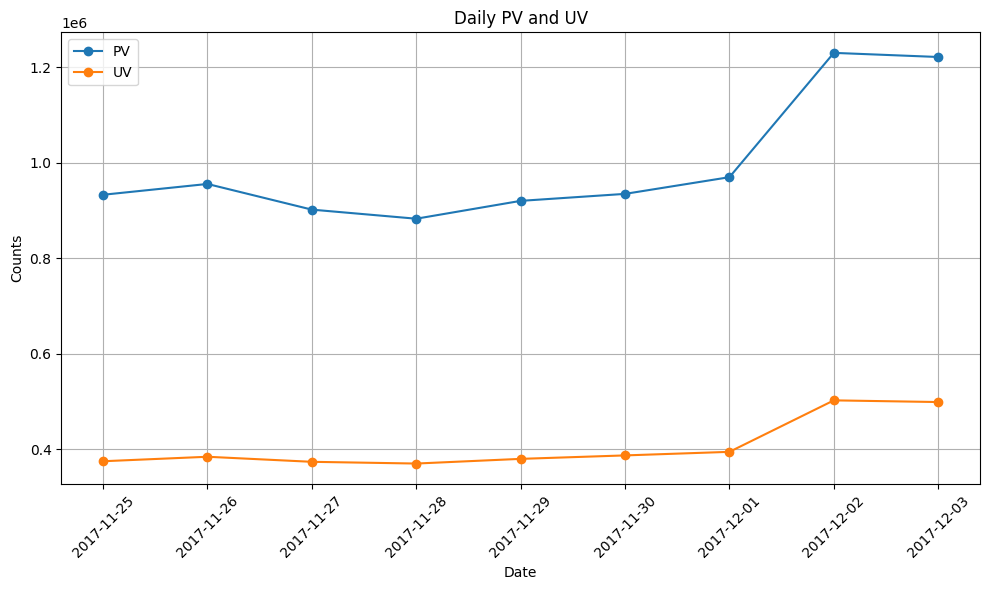

In [24]:
import matplotlib.pyplot as plt

pv_uv_puv['date'] = pd.to_datetime(pv_uv_puv['date'])

plt.figure(figsize=(10, 6))

plt.plot(pv_uv_puv['date'], pv_uv_puv['pv'], label='PV', marker='o')

plt.plot(pv_uv_puv['date'], pv_uv_puv['uv'], label='UV', marker='o')

plt.title('Daily PV and UV')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [25]:
filtered_taobao_df['dates'] = pd.to_datetime(filtered_taobao_df['date'])

user_dates = filtered_taobao_df.groupby(['user_id', 'dates']).size().reset_index(name='counts')

user_dates = user_dates.merge(user_dates, on='user_id', suffixes=('_a', '_b'))

user_dates['date_diff'] = (user_dates['dates_b'] - user_dates['dates_a']).dt.days

next_day = user_dates[user_dates['date_diff'] == 1].groupby('dates_a').size()
same_day = user_dates[user_dates['date_diff'] == 0].groupby('dates_a').size()

retention_rate = (next_day / same_day).reset_index()
retention_rate.columns = ['dates', 'retention_1']

retention_rate['dates'] = retention_rate['dates'].dt.strftime('%Y-%m-%d')

print(retention_rate)

C:\Users\Steven Luk\AppData\Local\Temp\ipykernel_4716\3583973492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_taobao_df['dates'] = pd.to_datetime(filtered_taobao_df['date'])


        dates  retention_1
0  2017-11-25     0.539187
1  2017-11-26     0.520152
2  2017-11-27     0.527061
3  2017-11-28     0.535256
4  2017-11-29     0.535888
5  2017-11-30     0.533649
6  2017-12-01     0.619759
7  2017-12-02     0.595449
8  2017-12-03          NaN


In [26]:
user_behavior_count = filtered_taobao_df.groupby('user_id').size()

# find one time users
bounce_users = user_behavior_count[user_behavior_count == 1].count()

# check the total_pv
total_pv = pv_uv_puv['pv'].sum()

# check the % of  bounce users
bounce_rate = bounce_users / total_pv

# 输出结果
print("流失用户:", bounce_users)
print("Total_pv:", total_pv)
print("流失率:", bounce_rate)

流失用户: 61106
Total_pv: 8953742
流失率: 0.006824632650795612


In [34]:
rfm_model_set_up = pd.DataFrame({
    'path': ['0001', '1001', '0011', '1011', '0101', '1101', '0111', '1111'],
    'description': [
        'Direct Purchase',          # 直接買(buy)
        'Browsed then Purchased',   # pv to buy
        'Added to Cart then Purchased',  # Cart to buy
        'Browsed and Added to Cart then Purchased',  # pv>cart>buy
        'Favorited then Purchased',  # fav>buy
        'Browsed and Favorited then Purchased',  # pv>fav>buy
        'Favorited and Added to Cart then Purchased',  # fav>car>buy
        'Browsed, Favorited and Added to Cart then Purchased'  # pv>fav>Car>buy
    ]
})

In [36]:
rfm_model_set_up

,path,description
0,0001,Direct Purchase
1,1001,Browsed then Purchased
2,0011,Added to Cart then Purchased
3,1011,Browsed and Added to Cart then Purchased
4,0101,Favorited then Purchased
5,1101,Browsed and Favorited then Purchased
6,0111,Favorited and Added to Cart then Purchased
7,1111,"Browsed, Favorited and Added to Cart then Purc..."


In [28]:
user_taobao_view = filtered_taobao_df.groupby(['user_id', 'item_id']).agg(
    pv=('behavior_type', lambda x: x[x == 'pv'].count()),
    fav=('behavior_type', lambda x: x[x == 'fav'].count()),
    cart=('behavior_type', lambda x: x[x == 'cart'].count()),
    buy=('behavior_type', lambda x: x[x == 'buy'].count())
).reset_index()

In [29]:
user_taobao_standard = user_taobao_view.assign(
    user_pv =lambda x: (x['pv'] > 0).astype(int),
    user_fav=lambda x: (x['fav'] > 0).astype(int),
    user_cart=lambda x: (x['cart'] > 0).astype(int),
    user_buy=lambda x: (x['buy'] > 0).astype(int)
)

In [30]:
user_taobao_path = user_taobao_standard[user_taobao_standard['user_buy'] > 0]
user_taobao_path['path'] = (
    user_taobao_path['user_pv'].astype(str) +
    user_taobao_path['user_fav'].astype(str) +
    user_taobao_path['user_cart'].astype(str) +
    user_taobao_path['user_buy'].astype(str)
)

C:\Users\Steven Luk\AppData\Local\Temp\ipykernel_4716\848672273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_taobao_path['path'] = (


In [37]:
path_count = user_taobao_path.groupby('path').size().reset_index(name='quantities').sort_values(by='quantities', ascending=False)

In [33]:
path_count.head()

,path,quantities
0,0001,164794
4,1001,30613
1,0011,2997
2,0101,1015
5,1011,875


In [40]:
path_result = pd.merge(path_count, rfm_model_set_up, on='path', how='inner')
path_result = path_result[['path', 'description', 'quantities']].sort_values(by='quantities', ascending=False)

In [41]:
print(path_result)

   path                                        description  quantities
0  0001                                    Direct Purchase      164794
1  1001                             Browsed then Purchased       30613
2  0011                       Added to Cart then Purchased        2997
3  0101                           Favorited then Purchased        1015
4  1011           Browsed and Added to Cart then Purchased         875
5  1101               Browsed and Favorited then Purchased         304
6  0111         Favorited and Added to Cart then Purchased          11
7  1111  Browsed, Favorited and Added to Cart then Purc...           4


In [51]:
from datetime import datetime
df_purchases = filtered_taobao_df[filtered_taobao_df['behavior_type'] == 'buy']

rfm = df_purchases.groupby('user_id').agg({
    'timestamp': lambda x: (datetime.now() - x.max()).days,  
    'user_id': 'count'   
}).rename(columns={'timestamp': 'recency', 'user_id': 'frequency'})


rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])  
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])  


print(rfm)

         recency  frequency recency_score frequency_score
user_id                                                  
2           2325          1             5               1
4           2328          1             3               1
25          2329          1             3               1
28          2325          1             5               1
41          2330          2             2               5
...          ...        ...           ...             ...
1017969     2331          1             2               5
1017972     2329          2             3               5
1017983     2327          1             4               5
1017987     2326          1             5               5
1017999     2331          1             2               5

[165481 rows x 4 columns]


In [84]:
def calculate_fscore(x):
    if x >= 100:
        return 5
    elif 50 <= x < 100:
        return 4
    elif 20 <= x < 50:
        return 3
    elif 5 <= x < 20:
        return 2
    else:
        return 1

rfm['fscore'] = rfm['frequency'].apply(calculate_fscore)

rfm['rscore'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

def classify_user(row):
    if row['fscore'] <= 2 and 1 <= row['rscore'] <= 2:
        return 'Bronze'
    elif row['fscore'] <= 3 and 2 <= row['rscore'] <= 3:
        return 'Silver'
    elif row['fscore'] <= 4 and 3 <= row['rscore'] <= 4:
        return 'Gold'
    else:
        return 'Diamond Member'

rfm['class'] = rfm.apply(classify_user, axis=1)

print(rfm)
print(rfm.groupby('class')['frequency'].count().reset_index().rename(columns={'frequency': 'count'}))

        user_id  recency  frequency recency_score frequency_score  fscore  \
0             2     2325          1             5               1       1   
1             4     2328          1             3               1       1   
2            25     2329          1             3               1       1   
3            28     2325          1             5               1       1   
4            41     2330          2             2               5       1   
...         ...      ...        ...           ...             ...     ...   
165476  1017969     2331          1             2               5       1   
165477  1017972     2329          2             3               5       1   
165478  1017983     2327          1             4               5       1   
165479  1017987     2326          1             5               5       1   
165480  1017999     2331          1             2               5       1   

        rscore           class  
0            5  Diamond Member  
1        

In [85]:
#rfm = rfm.reset_index(drop=True)
rfm['class'].value_counts()

class
Bronze            57747
Diamond Member    53359
Silver            36143
Gold              18232
Name: count, dtype: int64

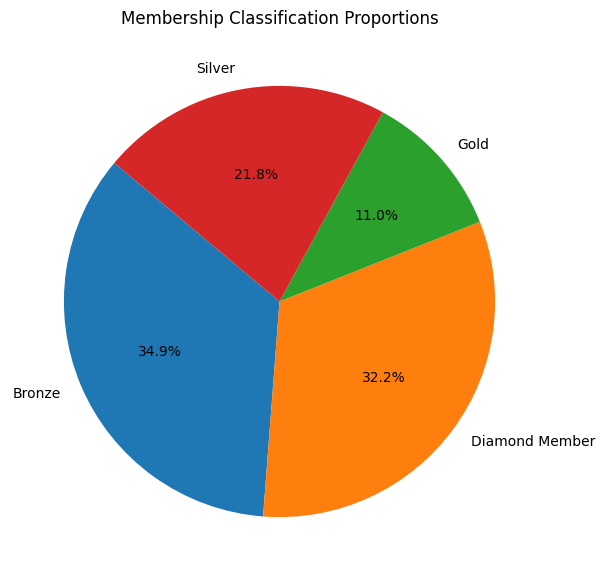

In [86]:
class_counts = rfm.groupby('class')['user_id'].count()

plt.figure(figsize=(10, 7)) 
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Membership Classification Proportions')
plt.show()